# Simulador Electoral

La idea es poder estimar la cantidad de  diputados que recibiría cada partido en las elecciones. Fundamentalmente se necesita establecer cada partido y la cantidad de votos por provincia, se puede hacer con 100 votos. 

In [1]:
# Paquetes a importar
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:

def eleccion_dhont(bancas, votos, porcentaje_piso, votos_totales = None):
    """
    Calcular la distribución de bancas usando el método D'Hondt con un piso electoral.
    
    Args:
    bancas (int): Número de bancas disponibles.
    votos (dict): Diccionario donde las claves son los nombres de los partidos y los valores son la cantidad de votos.
    porcentaje_piso (float): Porcentaje mínimo de votos totales que un partido necesita para ser elegible para la asignación de bancas.
    
    Returns:
    distribucion_bancas (dict): Diccionario con los nombres de los partidos como claves y el número de bancas asignadas como valores.
    """
    # Calcular el total de votos para determinar el piso electoral
    if votos_totales is None:
        votos_totales = sum(votos.values())
    piso_electoral = votos_totales * porcentaje_piso / 100
    
    # Filtrar los partidos que no alcanzan el piso electoral
    partidos_elegibles = {partido: voto for partido, voto in votos.items() if voto >= piso_electoral}
    
    if not partidos_elegibles:
        raise ValueError("Ningún partido cumple con el piso electoral.")
    
    # Preparar un DataFrame para almacenar votos, divisores y cocientes
    partidos = list(partidos_elegibles.keys())
    divisores = list(range(1, bancas + 1))
    
    # Crear un DataFrame donde cada fila es un partido y cada columna es un cociente basado en divisores
    tabla_dhont = pd.DataFrame(index=partidos, columns=divisores)
    
    # Llenar la tabla de D'Hondt con los cocientes (votos / divisor)
    for partido in partidos:
        for divisor in divisores:
            tabla_dhont.loc[partido, divisor] = partidos_elegibles[partido] / divisor
    
    # Aplanar la tabla para clasificar todos los cocientes y ordenarlos en orden descendente
    tabla_flat = tabla_dhont.stack().sort_values(ascending=False)
    
    # Tomar los primeros N cocientes donde N es el número de bancas
    mejores_cocientes = tabla_flat.head(bancas)
    
    # Inicializar un diccionario para almacenar la asignación de bancas
    distribucion_bancas = {partido: 0 for partido in partidos}
    
    # Para cada uno de los mejores N cocientes, asignar una banca al partido correspondiente
    for partido, _ in mejores_cocientes.index:
        distribucion_bancas[partido] += 1
    
    return distribucion_bancas


def senate(num_seats, votes, threshold):
    """
    """
    # Initialize allocation for all parties with 0 seats.
    allocation = {party: 0 for party in votes}
    
    # If no senatorial race, return allocation with all 0.
    if num_seats <= 0:
        return allocation
    
    # Filter parties that meet or exceed the threshold
    qualified = {party: vote for party, vote in votes.items() if vote >= threshold}
    if not qualified:
        # If no party qualifies, just return all 0's.
        return allocation
    
    # Sort the qualified parties by vote count in descending order.
    sorted_parties = sorted(qualified.items(), key=lambda x: x[1], reverse=True)
    
    if len(sorted_parties) == 1:
        # Only one party qualifies; award all 3 seats to it.
        allocation[sorted_parties[0][0]] = 3
    else:
        # Award 2 senators to the party with the highest votes and 1 to the runner-up.
        allocation[sorted_parties[0][0]] = 2
        allocation[sorted_parties[1][0]] = 1
    
    return allocation




In [3]:
# Diputados por Distrito electoral 


Diputados = {
    "Buenos Aires": 35,
    "BA City": 13,
    "Cordoba": 9,
    "Santa Fe": 9,
    "Mendoza": 5,
    "Entre Rios": 5,
    "Tucuman": 4,
    "Chaco": 4,
    "La Pampa": 3,
    "Catamarca": 3,
    "Corrientes": 3,
    "Neuquen": 3,
    "San Juan": 3,
    "San Luis": 3,
    "Santa Cruz": 3,
    "Jujuy": 3,
    "Misiones": 3,
    "Salta": 3,
    "S. del Estero": 3,
    "Chubut": 2,
    "Rio Negro": 2,
    "La Rioja": 2,
    "T. del Fuego": 2,
    "Formosa": 2}

In [22]:

# Ejemplo con 100 votos totales
bancas_totales = 30

# Votos por partido
votos = {
    'Partido A': 495069,
    'Partido B': 449444,
    'Partido C': 261595,
    'Partido D': 132788,
    'Partido E': 51925,
    'Partido F': 43019,
    'Partido G': 41058,
    'Partido H': 37988,
    'Partido I': 33352,
    'Partido J': 27454,
    'Partido K': 10256,
    'Partido L': 8328,
    'Partido M': 6299,
    'Partido N': 5439,
    'Partido O': 3227,
    'Partido P': 2585,
    'Partido Q': 2082}

# Piso electoral del 5%
piso_electoral = 3


# Ejecutar la función de elección D'Hondt
resultado = eleccion_dhont(bancas_totales, votos, piso_electoral)

# Imprimir la distribución de bancas

print("Distribución de bancas:", resultado)

Distribución de bancas: {'Partido A': 11, 'Partido B': 10, 'Partido C': 5, 'Partido D': 3, 'Partido E': 1}


# Ejericio 1 

Este esta armado para que vayamos soltando encuestas nacionales, PBA y CABA y de esa manera podamos actualizar como sería la composición 


In [5]:
def votos_de_encuestas(encuestas, Provincias):
    """

    """
    # Extract national-level data
    national_data = encuestas.get("Nacional", {})

    # Generate votes dictionary
    votes = {}
    for province in Provincias:
        if province in encuestas:
            # Use Encuestas data for the province
            votes[province] = encuestas[province]
        else:
            # Use national data for provinces not in Encuestas
            votes[province] = national_data.copy()

    return votes




# Example Input
encuestas = {"Nacional": {"UxP": 27.8393766856458, "Ruling_Party": 40.9649385675757, "Moderate_Opposition": 27.0152831884927, "Left_Wing": 4.18040155828589}}

provincias = [
    "Buenos Aires", "BA City", "Cordoba", "Santa Fe", "Mendoza", "Entre Rios", "Tucuman",
    "Chaco", "La Pampa", "Catamarca", "Corrientes", "Neuquen", "San Juan", "San Luis",
    "Santa Cruz", "Jujuy", "Misiones", "Salta", "S. del Estero", "Chubut", "Rio Negro",
    "La Rioja", "T. del Fuego", "Formosa"
]





Diputados = {
    "Buenos Aires": 35,
    "BA City": 13,
    "Cordoba": 9,
    "Santa Fe": 9,
    "Mendoza": 5,
    "Entre Rios": 5,
    "Tucuman": 4,
    "Chaco": 4,
    "La Pampa": 3,
    "Catamarca": 3,
    "Corrientes": 3,
    "Neuquen": 3,
    "San Juan": 3,
    "San Luis": 3,
    "Santa Cruz": 3,
    "Jujuy": 3,
    "Misiones": 3,
    "Salta": 3,
    "S. del Estero": 3,
    "Chubut": 2,
    "Rio Negro": 2,
    "La Rioja": 2,
    "T. del Fuego": 2,
    "Formosa": 2}


# Generate votes
votes = votos_de_encuestas(encuestas, provincias)

# Calculate congress seats
Piso_electoral = 3
results = {}
for province, num_diputados in Diputados.items():
    try:
        results[province] = eleccion_dhont(num_diputados, votes[province], Piso_electoral)
    except ValueError as e:
        results[province] = str(e)  # Handle cases where no party meets the threshold

# Display the results
results_df = pd.DataFrame(results).transpose()
results_df = results_df.fillna(0.0)

print(results_df)

               UxP  Ruling_Party  Moderate_Opposition  Left_Wing
Buenos Aires    10            15                    9          1
BA City          4             6                    3          0
Cordoba          3             4                    2          0
Santa Fe         3             4                    2          0
Mendoza          2             2                    1          0
Entre Rios       2             2                    1          0
Tucuman          1             2                    1          0
Chaco            1             2                    1          0
La Pampa         1             1                    1          0
Catamarca        1             1                    1          0
Corrientes       1             1                    1          0
Neuquen          1             1                    1          0
San Juan         1             1                    1          0
San Luis         1             1                    1          0
Santa Cruz       1       

In [6]:
UxP = results_df['UxP'].sum() + 52
Ruling_Party = results_df['Ruling_Party'].sum() + 35
Moderate_Opposition = results_df['Moderate_Opposition'].sum() + 42
Left_Wing = results_df['Left_Wing'].sum() + 1

print (results_df['UxP'].sum())
print (results_df['Ruling_Party'].sum())
print (results_df['Moderate_Opposition'].sum())
print (results_df['Left_Wing'].sum())



42
53
31
1


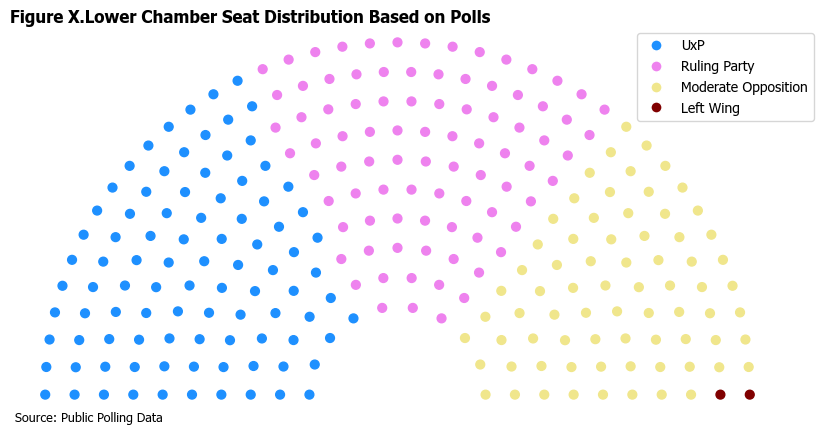

In [7]:

# Your seat counts:


def seats(N, M, r0=2.5):
    """
    Distribute N seats in M arcs (rows), starting with radius r0 down to 1.
    Returns a DataFrame with columns [x, y, r, theta].
    """
    radii = np.linspace(r0, 1, M)  # from r0 down to 1
    seat_rows = []

    for i in range(M):
        # Sum of the remaining radii from i to the end
        denom = np.sum(radii[i:])
        if denom == 0:
            # Edge case: if all remaining radii are zero, no more seats can be placed
            count_i = 0
        else:
            # Round to the nearest integer
            count_i = int(round(N * radii[i] / denom))

        # Generate angles for this arc
        if count_i > 0:
            theta_vals = np.linspace(0, np.pi, count_i)
        else:
            theta_vals = []

        # Create rows for each seat
        for theta in theta_vals:
            x = radii[i] * np.cos(theta)
            y = radii[i] * np.sin(theta)
            seat_rows.append({
                'x': x,
                'y': y,
                'r': i + 1,      # row index (1-based)
                'theta': theta   # angle
            })

        # Subtract the assigned seats from the total
        N -= count_i
        if N < 0:
            N = 0  # In case of rounding overshoot

    # Convert to DataFrame
    df = pd.DataFrame(seat_rows)
    # Sort by descending angle (theta) and descending row (r)
    df = df.sort_values(by=['theta', 'r'], ascending=[False, False])
    df.reset_index(drop=True, inplace=True)
    return df

def election(seats_df, counts):
    """
    Assign parties to seats. seats_df is the DataFrame from seats().
    counts is a list/array of seat counts (e.g., [79, 85, 90, 3]).
    """
    if sum(counts) != len(seats_df):
        raise ValueError("Sum of 'counts' does not match the total number of seats.")

    # Create a repeated list of party IDs, e.g. [1,1,1,...,2,2,2,...]
    party_ids = []
    for idx, c in enumerate(counts):
        party_ids += [idx + 1] * int(c)  # Ensure c is int

    seats_df['party'] = party_ids
    return seats_df

def main():
    # Create a DataFrame with your parties and their seat counts
    Results_polls = pd.DataFrame({
        'Party': ["UxP", "Ruling Party", "Moderate Opposition", "Left Wing"],
        'Result': [UxP, Ruling_Party, Moderate_Opposition, Left_Wing]
    })

    # Generate seat coordinates for a total of 257 seats across 16 arcs
    layout = seats(N=257, M=10,r0=4.0)
    
    # Assign parties based on their seat counts
    result = election(layout, Results_polls['Result'])

    party_colors = {
        1: "dodgerblue",
        2: "violet",
        3: "khaki",
        4: "maroon"}
    
    # Create a color column based on the 'party' ID
    result['color'] = result['party'].map(party_colors)

    # Plot
    plt.rcParams["font.family"] = "Tahoma"
    plt.figure(figsize=(10,5))
    # Use 'party' as the color index; 'tab10' can distinguish up to 10 categories
    plt.scatter(result['x'], result['y'], c=result['color'], s=40)

    plt.axis('equal')   # keep aspect ratio square
    plt.axis('off')     # hide axes
    plt.title("Figure X.Lower Chamber Seat Distribution Based on Polls",loc='left', fontweight='bold', fontsize=12, x=0, pad=0)
    
    parties = Results_polls['Party'].tolist()  # e.g. ["UxP", "Ruling Party", ...]
    handles = []
    for idx, party_name in enumerate(parties, start=1):
        handles.append(
            plt.Line2D(
                [0], [0],
                marker='o',
                color='w',
                label=party_name,
                markerfacecolor=party_colors[idx],
                markersize=8
            )
        )
    
    plt.legend(handles=handles,bbox_to_anchor=(0.8,1, 0, 0))

    #plt.legend(loc='best')
    plt.figtext(
        0.13, 0.09, 
        "Source: Public Polling Data",fontsize=9)

    plt.show()

    plt.show()

if __name__ == '__main__':
    main()


In [8]:
#################
#SENADO
#################

# Example Input
encuestas = {"Nacional": {"UxP": 25.4533434076313, "Ruling_Party": 41.8209293539856, "Moderate_Opposition": 28.2961843596524, "Left_Wing": 4.42954287873064},
             "Buenos Aires": {"UxP": 29.4106535700793, "Ruling_Party":49.5, "Moderate_Opposition":0, "Left_Wing": 6.57347941065357},
             "BA City": {"UxP": 0, "Ruling_Party": 30.884019644881, "Moderate_Opposition": 63.3547412164715, "Left_Wing": 6.12013600302229},
             "Cordoba": {"UxP": 2.04004533434076, "Ruling_Party": 39.5542123158292, "Moderate_Opposition": 44.2009822440499, "Left_Wing": 2.60672459387986},
             "Chubut": {"UxP": 13.7136380808462, "Ruling_Party": 35.3607857952399, "Moderate_Opposition": 32.1873819418209, "Left_Wing": 3.28673970532678},
             "Neuquen": {"UxP": 13.4869663770306, "Ruling_Party": 41.8209293539856, "Moderate_Opposition": 43.5209671326029, "Left_Wing": 1.81337363052512},
             "Rio Negro": {"UxP": 22.667170381564, "Ruling_Party": 51.0011333585191, "Moderate_Opposition": 27.2006044578768, "Left_Wing": 2.2667170381564},
             "Mendoza": {"UxP": 2878.73063845863, "Ruling_Party": 3320.74046089913, "Moderate_Opposition": 2980.73290517567, "Left_Wing": 0}}

provincias = [
    "Buenos Aires", "BA City", "Cordoba", "Santa Fe", "Mendoza", "Entre Rios", "Tucuman",
    "Chaco", "La Pampa", "Catamarca", "Corrientes", "Neuquen", "San Juan", "San Luis",
    "Santa Cruz", "Jujuy", "Misiones", "Salta", "S. del Estero", "Chubut", "Rio Negro",
    "La Rioja", "T. del Fuego", "Formosa"
]



Senadores = {
    "Buenos Aires": 0,
    "BA City": 3,
    "Cordoba": 0,
    "Santa Fe": 0,
    "Mendoza": 0,
    "Entre Rios": 3,
    "Tucuman": 0,
    "Chaco": 3,
    "La Pampa": 0,
    "Catamarca": 0,
    "Corrientes": 0,
    "Neuquen": 3,
    "San Juan": 0,
    "San Luis": 0,
    "Santa Cruz": 0,
    "Jujuy": 0,
    "Misiones": 0,
    "Salta": 3,
    "S. del Estero": 3,
    "Chubut": 0,
    "Rio Negro": 3,
    "La Rioja": 0,
    "T. del Fuego": 3,
    "Formosa": 0}







results = {}
for province, num_seats in Senadores.items():
    try:
        # Replace eleccion_dhont with senate. Here num_seats serves both to indicate
        # the district's senatorial race status and is not used for actual seat counting.
        results[province] = senate(num_seats, votes[province], Piso_electoral)
    except ValueError as e:
        results[province] = str(e)  # Handle cases where no party meets the threshold

# Display the results (using pandas, as before)
results_senado_df = pd.DataFrame(results).transpose()
results_senado_df = results_senado_df.fillna(0.0)
print(results_senado_df)


               UxP  Ruling_Party  Moderate_Opposition  Left_Wing
Buenos Aires     0             0                    0          0
BA City          1             2                    0          0
Cordoba          0             0                    0          0
Santa Fe         0             0                    0          0
Mendoza          0             0                    0          0
Entre Rios       1             2                    0          0
Tucuman          0             0                    0          0
Chaco            1             2                    0          0
La Pampa         0             0                    0          0
Catamarca        0             0                    0          0
Corrientes       0             0                    0          0
Neuquen          1             2                    0          0
San Juan         0             0                    0          0
San Luis         0             0                    0          0
Santa Cruz       0       

In [9]:
UxP = results_senado_df['UxP'].sum() + 19
Ruling_Party = results_senado_df['Ruling_Party'].sum() + 6
Moderate_Opposition = results_senado_df['Moderate_Opposition'].sum() + 23
Left_Wing = results_senado_df['Left_Wing'].sum() + 0



print(results_senado_df['UxP'].sum())
print(results_senado_df['Ruling_Party'].sum())
print(results_senado_df['Moderate_Opposition'].sum())
print(results_senado_df['Left_Wing'].sum())
print (UxP)
print (Ruling_Party)
print (Moderate_Opposition)
print (Left_Wing)

8
16
0
0
27
22
23
0


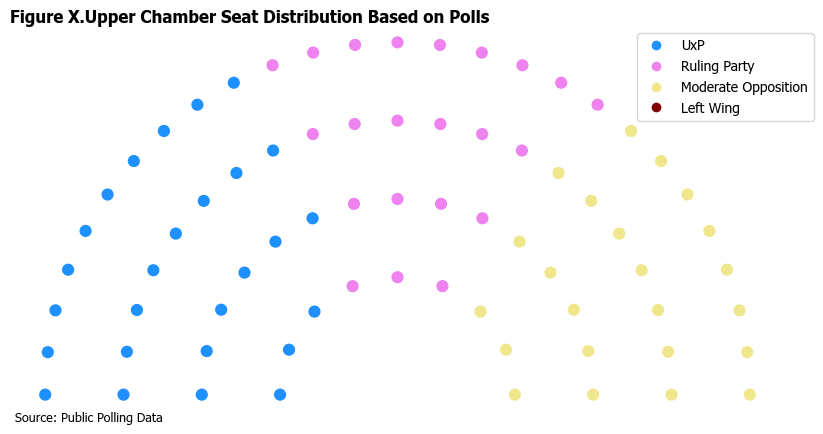

In [10]:

# Your seat counts:


def seats(N, M, r0=2.5):
    """
    Distribute N seats in M arcs (rows), starting with radius r0 down to 1.
    Returns a DataFrame with columns [x, y, r, theta].
    """
    radii = np.linspace(r0, 1, M)  # from r0 down to 1
    seat_rows = []

    for i in range(M):
        # Sum of the remaining radii from i to the end
        denom = np.sum(radii[i:])
        if denom == 0:
            # Edge case: if all remaining radii are zero, no more seats can be placed
            count_i = 0
        else:
            # Round to the nearest integer
            count_i = int(round(N * radii[i] / denom))

        # Generate angles for this arc
        if count_i > 0:
            theta_vals = np.linspace(0, np.pi, count_i)
        else:
            theta_vals = []

        # Create rows for each seat
        for theta in theta_vals:
            x = radii[i] * np.cos(theta)
            y = radii[i] * np.sin(theta)
            seat_rows.append({
                'x': x,
                'y': y,
                'r': i + 1,      # row index (1-based)
                'theta': theta   # angle
            })

        # Subtract the assigned seats from the total
        N -= count_i
        if N < 0:
            N = 0  # In case of rounding overshoot

    # Convert to DataFrame
    df = pd.DataFrame(seat_rows)
    # Sort by descending angle (theta) and descending row (r)
    df = df.sort_values(by=['theta', 'r'], ascending=[False, False])
    df.reset_index(drop=True, inplace=True)
    return df

def election(seats_df, counts):
    """
    Assign parties to seats. seats_df is the DataFrame from seats().
    counts is a list/array of seat counts (e.g., [79, 85, 90, 3]).
    """
    if sum(counts) != len(seats_df):
        raise ValueError("Sum of 'counts' does not match the total number of seats.")

    # Create a repeated list of party IDs, e.g. [1,1,1,...,2,2,2,...]
    party_ids = []
    for idx, c in enumerate(counts):
        party_ids += [idx + 1] * int(c)  # Ensure c is int

    seats_df['party'] = party_ids
    return seats_df


# Create a DataFrame with your parties and their seat counts
Results_polls = pd.DataFrame({
    'Party': ["UxP", "Ruling Party", "Moderate Opposition", "Left Wing"],
    'Result': [UxP, Ruling_Party, Moderate_Opposition, Left_Wing]
})
# Generate seat coordinates for a total of 257 seats across 16 arcs
layout = seats(N=72, M=4,r0=3)

# Assign parties based on their seat counts
result = election(layout, Results_polls['Result'])
party_colors = {
    1: "dodgerblue",
    2: "violet",
    3: "khaki",
    4: "maroon"}

# Create a color column based on the 'party' ID
result['color'] = result['party'].map(party_colors)
# Plot
plt.rcParams["font.family"] = "Tahoma"
plt.figure(figsize=(10,5))
# Use 'party' as the color index; 'tab10' can distinguish up to 10 categories
plt.scatter(result['x'], result['y'], c=result['color'], s=60)
plt.axis('equal')   # keep aspect ratio square
plt.axis('off')     # hide axes
plt.title("Figure X.Upper Chamber Seat Distribution Based on Polls",loc='left', fontweight='bold', fontsize=12, x=0, pad=0)

parties = Results_polls['Party'].tolist()  # e.g. ["UxP", "Ruling Party", ...]
handles = []
for idx, party_name in enumerate(parties, start=1):
    handles.append(
        plt.Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=party_name,
            markerfacecolor=party_colors[idx],
            markersize=8
        )
    )

plt.legend(handles=handles,bbox_to_anchor=(0.8,1, 0, 0))
#plt.legend(loc='best')
plt.figtext(
    0.13, 0.09, 
    "Source: Public Polling Data",fontsize=9)
plt.show()
plt.show()



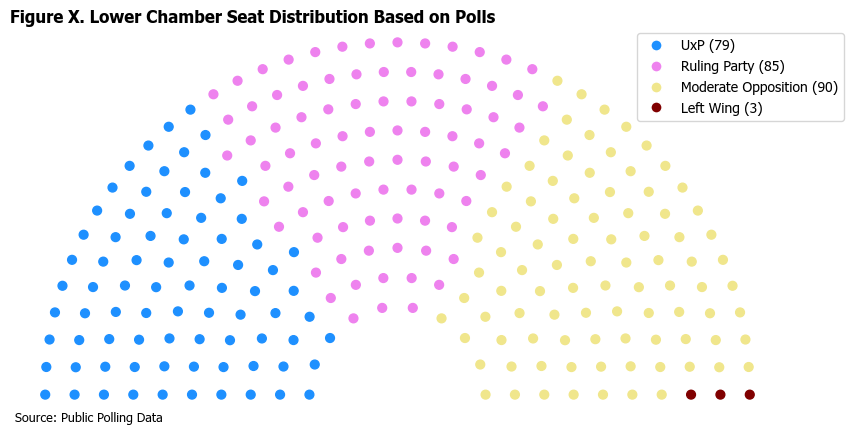

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# 1. Seat layout function
# --------------------------
def seats(N, M, r0=4.0):
    """
    Distribute N seats in M arcs (rows), starting with radius r0 down to 1.
    Returns a DataFrame with columns [x, y, r, theta].
    """
    radii = np.linspace(r0, 1, M)
    seat_rows = []

    for i in range(M):
        denom = np.sum(radii[i:])
        if denom == 0:
            count_i = 0
        else:
            count_i = int(round(N * radii[i] / denom))

        if count_i > 0:
            theta_vals = np.linspace(0, np.pi, count_i)
        else:
            theta_vals = []

        for theta in theta_vals:
            x = radii[i] * np.cos(theta)
            y = radii[i] * np.sin(theta)
            seat_rows.append({
                'x': x,
                'y': y,
                'r': i + 1,     # row index (1-based)
                'theta': theta  # angle
            })

        N -= count_i
        if N < 0:
            N = 0

    df = pd.DataFrame(seat_rows)
    # Sort by descending angle (theta) and descending row (r)
    df = df.sort_values(by=['theta', 'r'], ascending=[False, False])
    df.reset_index(drop=True, inplace=True)
    return df

# --------------------------
# 2. Assign parties to seats
# --------------------------
def election(seats_df, counts):
    """
    Assign parties to seats. seats_df is the DataFrame from seats().
    'counts' is a list of seat counts, e.g. [79, 85, 90, 3].
    """
    if sum(counts) != len(seats_df):
        raise ValueError("Sum of 'counts' does not match total seats.")

    # Build a list of party IDs: [1,1,...,2,2,...,3,3,...]
    party_ids = []
    for idx, c in enumerate(counts):
        party_ids += [idx + 1] * c

    seats_df['party'] = party_ids
    return seats_df

# --------------------------
# 3. Main script
# --------------------------
def main():
    # Define your parties here as a list of dictionaries.
    # Each dict has: name, seats, and color.
    parties = [
        {"name": "UxP",                  "seats": 79, "color": "dodgerblue"},
        {"name": "Ruling Party",         "seats": 85, "color": "violet"},
        {"name": "Moderate Opposition",  "seats": 90, "color": "khaki"},
        {"name": "Left Wing",            "seats": 3,  "color": "maroon"}
    ]

    # Sum all seats to get total N
    total_seats = sum(p["seats"] for p in parties)

    # Generate seat layout (adjust M=10 or r0=4.0 as needed)
    layout_df = seats(N=total_seats, M=10, r0=4.0)

    # Prepare a list of seat counts in the same order
    seat_counts = [p["seats"] for p in parties]

    # Assign each seat to a party
    result = election(layout_df, seat_counts)

    # Map numeric party ID (1-based) to each party's color
    party_colors = {}
    for i, p in enumerate(parties, start=1):
        party_colors[i] = p["color"]

    # Create a 'color' column in the result
    result['color'] = result['party'].map(party_colors)

    # Plot
    plt.figure(figsize=(10,5))
    plt.rcParams["font.family"] = "Tahoma"

    # Use each seat's custom color
    plt.scatter(result['x'], result['y'], c=result['color'], s=40)

    plt.axis('equal')
    plt.axis('off')
    plt.title("Figure X. Lower Chamber Seat Distribution Based on Polls",
              loc='left', fontweight='bold', fontsize=12, x=0, pad=0)

    # Create a custom legend with party names + seat counts
    handles = []
    for i, p in enumerate(parties, start=1):
        # Label includes party name + seat count
        label_with_count = f"{p['name']} ({p['seats']})"
        handles.append(
            plt.Line2D(
                [0], [0],
                marker='o',
                color='w',
                label=label_with_count,
                markerfacecolor=p["color"],
                markersize=8
            )
        )

    # Place the legend somewhere convenient
    plt.legend(handles=handles, bbox_to_anchor=(0.8, 1, 0, 0))

    # Add a source annotation
    plt.figtext(
        0.13, 0.09,
        "Source: Public Polling Data",
        fontsize=9
    )

    plt.show()

if __name__ == '__main__':
    main()


# Ejercicio 2


Este ejercicio corre para distintas provincias el resultado de las elecciones generales de 2023. 

In [12]:
votes = {
    "Buenos Aires": {"UxP": 4327441,"Ruling_party": 2593075,"Moderate_opposition": 2423384 + 373087,"Left": 359538},
    "BA City": {"UxP": 616182,"Ruling_party": 382488,"Moderate_opposition": 789454 + 58788,"Left": 67666},
    "Catamarca": {"UxP": 104322,"Ruling_party": 78017,"Moderate_opposition": 41719 + 15677,"Left": 3841},
    "Chaco": {"UxP": 313941,"Ruling_party": 200006,"Moderate_opposition": 173253 + 26059,"Left": 5637},
    "Chubut": {"UxP": 111752,"Ruling_party": 121842,"Moderate_opposition": 71343 + 26722,"Left": 15187},
    "Cordoba": {"UxP": 309044,"Ruling_party": 773428,"Moderate_opposition": 52131 + 667447,"Left": 31922},
    "Corrientes": {"UxP": 26217,"Ruling_party": 189282,"Moderate_opposition": 226371 + 19215,"Left": 7464},
    "Entre Rios": {"UxP": 283136,"Ruling_party": 252719,"Moderate_opposition": 255236 + 4554,"Left": 13248},
    "Formosa": {"UxP": 189593,"Ruling_party": 10533,"Moderate_opposition": 55738 + 8843,"Left": 2954},
    "Jujuy": {"UxP": 148103,"Ruling_party": 170966,"Moderate_opposition": 91373 + 31063,"Left": 16193},
    "La Pampa": {"UxP": 80611,"Ruling_party": 77493,"Moderate_opposition": 5064 + 17195,"Left": 5292},
    "La Rioja": {"UxP": 98739,"Ruling_party": 90328,"Moderate_opposition": 28314 + 20416,"Left": 2219},
    "Mendoza": {"UxP": 269326,"Ruling_party": 475272,"Moderate_opposition": 289533 + 48472,"Left": 38932},
    "Misiones": {"UxP": 277836,"Ruling_party": 309077,"Moderate_opposition": 105384 + 30036,"Left": 10228},
    "Neuquen": {"UxP": 135881,"Ruling_party": 157187,"Moderate_opposition": 87952 + 25438,"Left": 21356},
    "Rio Negro": {"UxP": 168235,"Ruling_party": 150079,"Moderate_opposition": 80591 + 27782,"Left": 17847},
    "Salta": {"UxP": 323105,"Ruling_party": 110702,"Moderate_opposition": 49587 + 14014,"Left": 25419},
    "San Juan": {"UxP": 155794,"Ruling_party": 164117,"Moderate_opposition": 108547 + 28879,"Left": 10455},
    "San Luis": {"UxP": 88235,"Ruling_party": 139894,"Moderate_opposition": 67517 + 20159,"Left": 7055},
    "Santa Cruz": {"UxP": 67336,"Ruling_party": 64687,"Moderate_opposition": 29234 + 11757,"Left": 5161},
    "Santa Fe": {"UxP": 607088,"Ruling_party": 664607,"Moderate_opposition": 549363 + 184337,"Left": 3855},
    "S. del Estero": {"UxP": 416597,"Ruling_party": 144659,"Moderate_opposition": 50749 + 13489,  "Left": 7912},
    "T. del Fuego": {"UxP": 40889,"Ruling_party": 36202,"Moderate_opposition": 16043 + 9767,"Left": 4137},
    "Tucuman": {"UxP": 476361,"Ruling_party": 37113,"Moderate_opposition": 155273 + 42313,"Left": 15253}
}




# Set the electoral threshold (e.g., 5%)
electoral_threshold = 3

# Calculate the results for each province
results = {}
for province, num_congressmen in Diputados.items():
    try:
        results[province] = eleccion_dhont(num_congressmen, votes[province], electoral_threshold)
    except ValueError as e:
        results[province] = str(e)  # Handle cases where no party meets the threshold

# Display the results
results_df = pd.DataFrame(results).transpose()
results_df = results_df.fillna(0.0)

print(results_df)

                UxP  Ruling_party  Moderate_opposition  Left
Buenos Aires   15.0           9.0                 10.0   1.0
BA City         4.0           3.0                  6.0   0.0
Cordoba         1.0           4.0                  4.0   0.0
Santa Fe        3.0           3.0                  3.0   0.0
Mendoza         1.0           2.0                  2.0   0.0
Entre Rios      2.0           1.0                  2.0   0.0
Tucuman         3.0           0.0                  1.0   0.0
Chaco           2.0           1.0                  1.0   0.0
La Pampa        2.0           1.0                  0.0   0.0
Catamarca       1.0           1.0                  1.0   0.0
Corrientes      0.0           1.0                  2.0   0.0
Neuquen         1.0           1.0                  1.0   0.0
San Juan        1.0           1.0                  1.0   0.0
San Luis        1.0           1.0                  1.0   0.0
Santa Cruz      1.0           1.0                  1.0   0.0
Jujuy           1.0     

In [13]:
results = {}
for province, num_seats in Senadores.items():
    try:
        # Replace eleccion_dhont with senate. Here num_seats serves both to indicate
        # the district's senatorial race status and is not used for actual seat counting.
        results[province] = senate(num_seats, votes[province], Piso_electoral)
    except ValueError as e:
        results[province] = str(e)  # Handle cases where no party meets the threshold

# Display the results (using pandas, as before)
results_senado_df = pd.DataFrame(results).transpose()
results_senado_df = results_senado_df.fillna(0.0)
print(results_senado_df)

               UxP  Ruling_party  Moderate_opposition  Left
Buenos Aires     0             0                    0     0
BA City          1             0                    2     0
Cordoba          0             0                    0     0
Santa Fe         0             0                    0     0
Mendoza          0             0                    0     0
Entre Rios       2             0                    1     0
Tucuman          0             0                    0     0
Chaco            2             1                    0     0
La Pampa         0             0                    0     0
Catamarca        0             0                    0     0
Corrientes       0             0                    0     0
Neuquen          1             2                    0     0
San Juan         0             0                    0     0
San Luis         0             0                    0     0
Santa Cruz       0             0                    0     0
Jujuy            0             0        

# Ejercicio 4


In [14]:
votes_2009= {
    "Buenos Aires": {"Hard_opposition": 2606632,"Ruling_party": 2418104,"Moderate_opposition": 1613037 + 415961,"Left": 359538},
    "BA City": {"Hard_opposition": 567695,"Ruling_party": 211277 ,"Moderate_opposition": 441971 + 348261,"Left": 67666},
    "Catamarca": {"Hard_opposition": 58758,"Ruling_party": 50489,"Moderate_opposition": 26779,"Left": 7623},
    "Chaco": {"Hard_opposition": 229045	,"Ruling_party": 257147	,"Moderate_opposition": 5805,"Left": 8640},
    "Chubut": {"Hard_opposition": 43507,"Ruling_party": 132818,"Moderate_opposition": 19088,"Left": 0},
    "Cordoba": {"Hard_opposition": 485096,"Ruling_party": 151753,"Moderate_opposition": 468918+428.902,"Left": 31922},
    "Corrientes": {"Hard_opposition": 26217,"Ruling_party": 189282,"Moderate_opposition": 428902,"Left": 0},
    "Entre Rios": {"Hard_opposition": 226874 + 63510,"Ruling_party": 231161,"Moderate_opposition": 142086,"Left": 0},
    "Formosa": {"Hard_opposition": 87081,"Ruling_party": 112019,"Moderate_opposition": 0 ,"Left": 0},
    "Jujuy": {"Hard_opposition": 148103,"Ruling_party": 170966,"Moderate_opposition": 45873,"Left": 0},
    "La Pampa": {"Hard_opposition":63156 ,"Ruling_party": 67071,"Moderate_opposition": 22307,"Left": 0},
    "La Rioja": {"Hard_opposition": 84028,"Ruling_party": 50528,"Moderate_opposition": 11478,"Left": 0},
    "Mendoza": {"Hard_opposition": 125074,"Ruling_party": 234441,"Moderate_opposition":423022 ,"Left": 31293},
    "Misiones": {"Hard_opposition": 73933,"Ruling_party": 73483,"Moderate_opposition": 212621,"Left": 10228},
    "Neuquen": {"Hard_opposition": 67828,"Ruling_party": 34797,"Moderate_opposition": 78703,"Left": 21356},
    "Rio Negro": {"Hard_opposition": 76133,"Ruling_party": 86957,"Moderate_opposition": 66270,"Left": 20892},
    "Salta": {"Hard_opposition": 83270,"Ruling_party": 145052,"Moderate_opposition": 115395,"Left": 35705},
    "San Juan": {"Hard_opposition": 48529	,"Ruling_party": 180774,"Moderate_opposition": 60796,"Left": 11376},
    "San Luis": {"Hard_opposition": 30440,"Ruling_party": 24327,"Moderate_opposition": 102149,"Left": 7055},
    "Santa Cruz": {"Hard_opposition": 53209,"Ruling_party": 51427,"Moderate_opposition": 9355,"Left": 5643},
    "Santa Fe": {"Hard_opposition": 672351,"Ruling_party": 162615,"Moderate_opposition": 673382,"Left": 37850},
    "S. del Estero": {"Hard_opposition": 34693,"Ruling_party": 194537 + 48951,"Moderate_opposition": 50749 + 13489,  "Left": 0},
    "T. del Fuego": {"Hard_opposition": 9104,"Ruling_party": 15376,"Moderate_opposition": 12653,"Left": 6117},
    "Tucuman": {"Hard_opposition": 112182+69852+57520,"Ruling_party": 381109,"Moderate_opposition": 155273 + 42313,"Left": 23212}
}

total_votes_by_province_2009 = {
    "Buenos Aires": 7515293,
    "BA City": 1819907,
    "Catamarca": 150834,
    "Chaco": 514981,
    "Chubut": 238038,
    "Cordoba": 1671116,
    "Corrientes": 433727,
    "Entre Rios": 660255,
    "Formosa": 227454,
    "Jujuy": 281484,
    "La Pampa": 177742,
    "La Rioja": 156853,
    "Mendoza": 870772,
    "Misiones": 441810,
    "Neuquen": 266789,
    "Rio Negro": 276818,
    "Salta": 490282,
    "San Juan": 321231,
    "San Luis": 193596,
    "Santa Cruz": 124996,
    "Santa Fe": 1688995,
    "S. del Estero": 311997,
    "T. del Fuego": 60914,
    "Tucuman": 720817
}



Piso_electoral = 3  # Porcentaje del piso electoral
results_diputados_2009 = {}

for province, num_diputados in Diputados.items():
    # Obtiene el total fabricado de votos para cada provincia. Si no se encuentra, se usa un valor por defecto.
    fabricated_total_votes = total_votes_by_province_2009.get(province, 1000000)
    try:
        results_diputados_2009[province] = eleccion_dhont(
            num_diputados,
            votes_2009[province],
            Piso_electoral,
            votos_totales =fabricated_total_votes
        )
    except ValueError as e:
        results_diputados_2009[province] = str(e)  # En caso de que ningún partido cumpla el piso electoral

# Crear y mostrar un DataFrame con los resultados
results_diputados_2009_df = pd.DataFrame(results_diputados_2009).transpose().fillna(0.0)
#
# print(results_diputados_2009_df)

results_senado = {}
for province, num_seats in Senadores.items():
    try:
        # Replace eleccion_dhont with senate. Here num_seats serves both to indicate
        # the district's senatorial race status and is not used for actual seat counting.
        results_senado[province] = senate(num_seats, votes_2009[province], Piso_electoral)
    except ValueError as e:
        results_senado[province] = str(e)  # Handle cases where no party meets the threshold

# Display the results (using pandas, as before)
results_senado_2009_df = pd.DataFrame(results_senado).transpose()
results_senado_2009_df = results_senado_df.fillna(0.0)
#print(results_senado_2009_df)

In [15]:
votes_2017= {
    "Buenos Aires": {"Hard_opposition": 3383114,"Ruling_party": 3930406,"Moderate_opposition": 1028385 + 485138,"Left": 497665},
    "BA City": {"Hard_opposition": 419176,"Ruling_party": 982867,"Moderate_opposition": 237132 + 93980,"Left": 111696 + 82.977},
    "Catamarca": {"Hard_opposition": 95927,"Ruling_party": 83937,"Moderate_opposition": 11935,"Left": 8715},
    "Chaco": {"Hard_opposition": 271110,"Ruling_party": 257053,"Moderate_opposition": 69786 + 18615,"Left": 32220},
    "Chubut": {"Hard_opposition": 101613,"Ruling_party": 95266,"Moderate_opposition": 73026,"Left": 12084},
    "Cordoba": {"Hard_opposition": 199683,"Ruling_party": 996950,"Moderate_opposition": 626887 + 72533,"Left": 67956},
    "Corrientes": {"Hard_opposition": 146730,"Ruling_party": 317900,"Moderate_opposition": 85135,"Left": 2390},
    "Entre Rios": {"Hard_opposition": 313605,"Ruling_party": 437962,"Moderate_opposition": 0,"Left": 39102},
    "Formosa": {"Hard_opposition": 202817,"Ruling_party": 119865,"Moderate_opposition": 1174,"Left": 3831},
    "Jujuy": {"Hard_opposition": 148103,"Ruling_party": 185253,"Moderate_opposition": 33859,"Left": 63512},
    "La Pampa": {"Hard_opposition": 96121,"Ruling_party": 96045,"Moderate_opposition": 7229,"Left": 4257},
    "La Rioja": {"Hard_opposition": 84477,"Ruling_party": 85685,"Moderate_opposition": 29176,"Left": 4170},
    "Mendoza": {"Hard_opposition": 272552,"Ruling_party": 491012,"Moderate_opposition": 184610,"Left": 125516},
    "Misiones": {"Hard_opposition": 268646,"Ruling_party": 211164,"Moderate_opposition": 80004,"Left": 10380},
    "Neuquen": {"Hard_opposition": 73310,"Ruling_party": 106821,"Moderate_opposition": 81077,"Left": 22783},
    "Rio Negro": {"Hard_opposition": 189557,"Ruling_party": 122838,"Moderate_opposition": 42937,"Left": 14636},
    "Salta": {"Hard_opposition": 162.389,"Ruling_party": 211377,"Moderate_opposition":170759,"Left": 25419},
    "San Juan": {"Hard_opposition": 226425,"Ruling_party": 132820,"Moderate_opposition": 20379,"Left": 11514},
    "San Luis": {"Hard_opposition": 158573,"Ruling_party": 123994,"Moderate_opposition": 0,"Left": 5722},
    "Santa Cruz": {"Hard_opposition": 52953,"Ruling_party": 72759,"Moderate_opposition": 0,"Left": 16222},
    "Santa Fe": {"Hard_opposition": 509190,"Ruling_party": 743139,"Moderate_opposition": 287613,"Left": 0},
    "S. del Estero": {"Hard_opposition": 384125,"Ruling_party": 94968,"Moderate_opposition": 21595,  "Left": 10332},
    "T. del Fuego": {"Hard_opposition": 27825,"Ruling_party": 27654,"Moderate_opposition": 16043 + 9767,"Left": 3270},
    "Tucuman": {"Hard_opposition": 460198,"Ruling_party": 319615,"Moderate_opposition": 155089,"Left": 46604}
}

total_votes_by_province_2017 = {
    "Buenos Aires": 9324708,
    "BA City": 1927828,
    "Catamarca": 200514,
    "Chaco": 648784,
    "Chubut": 305755,
    "Cordoba": 2056395,
    "Corrientes": 573555,
    "Entre Rios": 826033,
    "Formosa": 327687,
    "Jujuy": 358101,
    "La Pampa": 211610,
    "La Rioja": 191358,
    "Mendoza": 1073690,
    "Misiones": 628275,
    "Neuquen": 378695,
    "Rio Negro": 384014,
    "Salta": 698818,
    "San Juan": 421824,
    "San Luis": 288289,
    "Santa Cruz": 165707,
    "Santa Fe": 1966065,
    "S. del Estero": 548016,
    "T. del Fuego": 92887,
    "Tucuman": 981506
}



Piso_electoral = 3  # Porcentaje del piso electoral
results_diputados_2017 = {}

for province, num_diputados in Diputados.items():
    # Obtiene el total fabricado de votos para cada provincia. Si no se encuentra, se usa un valor por defecto.
    fabricated_total_votes = total_votes_by_province_2017.get(province, 1000000)
    try:
        results_diputados_2017[province] = eleccion_dhont(
            num_diputados,
            votes_2017[province],
            Piso_electoral,
            votos_totales =fabricated_total_votes
        )
    except ValueError as e:
        results_diputados_2017[province] = str(e)  # En caso de que ningún partido cumpla el piso electoral

# Crear y mostrar un DataFrame con los resultados
results_diputados_2017_df = pd.DataFrame(results_diputados_2017).transpose().fillna(0.0)
#print(results_diputados_2017_df)

results_senado = {}
for province, num_seats in Senadores.items():
    try:
        # Replace eleccion_dhont with senate. Here num_seats serves both to indicate
        # the district's senatorial race status and is not used for actual seat counting.
        results_senado[province] = senate(num_seats, votes_2017[province], Piso_electoral)
    except ValueError as e:
        results_senado[province] = str(e)  # Handle cases where no party meets the threshold

# Display the results (using pandas, as before)
results_senado_2017_df = pd.DataFrame(results_senado).transpose()
results_senado_2017_df = results_senado_df.fillna(0.0)
#print(results_senado_2017_df)



In [16]:
print(results_diputados_2009_df)

               Hard_opposition  Ruling_party  Moderate_opposition  Left
Buenos Aires              12.0          12.0                 10.0   1.0
BA City                    5.0           1.0                  7.0   0.0
Cordoba                    4.0           1.0                  4.0   0.0
Santa Fe                   4.0           1.0                  4.0   0.0
Mendoza                    1.0           1.0                  3.0   0.0
Entre Rios                 2.0           2.0                  1.0   0.0
Tucuman                    1.0           2.0                  1.0   0.0
Chaco                      2.0           2.0                  0.0   0.0
La Pampa                   1.0           2.0                  0.0   0.0
Catamarca                  2.0           1.0                  0.0   0.0
Corrientes                 0.0           1.0                  2.0   0.0
Neuquen                    1.0           0.0                  2.0   0.0
San Juan                   0.0           2.0                  1.

In [17]:
print(results_senado_2009_df)

               UxP  Ruling_party  Moderate_opposition  Left
Buenos Aires     0             0                    0     0
BA City          1             0                    2     0
Cordoba          0             0                    0     0
Santa Fe         0             0                    0     0
Mendoza          0             0                    0     0
Entre Rios       2             0                    1     0
Tucuman          0             0                    0     0
Chaco            2             1                    0     0
La Pampa         0             0                    0     0
Catamarca        0             0                    0     0
Corrientes       0             0                    0     0
Neuquen          1             2                    0     0
San Juan         0             0                    0     0
San Luis         0             0                    0     0
Santa Cruz       0             0                    0     0
Jujuy            0             0        

In [18]:
print(results_diputados_2017_df)

               Hard_opposition  Ruling_party  Moderate_opposition  Left
Buenos Aires              13.0          15.0                  6.0   1.0
BA City                    3.0           8.0                  2.0   0.0
Cordoba                    1.0           5.0                  3.0   0.0
Santa Fe                   3.0           5.0                  1.0   0.0
Mendoza                    1.0           3.0                  1.0   0.0
Entre Rios                 2.0           3.0                  0.0   0.0
Tucuman                    2.0           2.0                  0.0   0.0
Chaco                      2.0           2.0                  0.0   0.0
La Pampa                   2.0           1.0                  0.0   0.0
Catamarca                  2.0           1.0                  0.0   0.0
Corrientes                 1.0           2.0                  0.0   0.0
Neuquen                    1.0           1.0                  1.0   0.0
San Juan                   2.0           1.0                  0.

In [19]:
print(results_senado_2017_df)

               UxP  Ruling_party  Moderate_opposition  Left
Buenos Aires     0             0                    0     0
BA City          1             0                    2     0
Cordoba          0             0                    0     0
Santa Fe         0             0                    0     0
Mendoza          0             0                    0     0
Entre Rios       2             0                    1     0
Tucuman          0             0                    0     0
Chaco            2             1                    0     0
La Pampa         0             0                    0     0
Catamarca        0             0                    0     0
Corrientes       0             0                    0     0
Neuquen          1             2                    0     0
San Juan         0             0                    0     0
San Luis         0             0                    0     0
Santa Cruz       0             0                    0     0
Jujuy            0             0        

In [20]:
#####################
#
#BALLOTAGE Rentención 
#
#####################


